In [1]:
#edit only this tab
#give the folder path of the match
path = "/home/kirugulige/Documents/Football-Analytics/open-data-master/data/events/"
home_team = 'Espanyol'
away_team = 'Barcelona'

In [2]:
import json
import os
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import StatsbombPitch as sb
from functools import reduce

Xg_req = pd.DataFrame(data=None)

filename = '69275.json' # remove the comment line to work for this match
with codecs.open("%s" % path + filename,encoding='utf-8') as data_file:    
    data = json.load(data_file)
    df = pd.DataFrame(data=None)
        
    df = pd.json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

done


In [3]:
#type_id=30 is pass event AND type_id=19 is substitution event

pass_m = df.query('type_id == 30')
substitution = df.query('type_id == 19')
#pass_m = df.query('type_name == pass')


In [4]:
#this cell is WIP
substitution_home = set()
substitution_home = substitution[substitution.team_name == home_team]
substitution_home = substitution_home['substitution_replacement_name'].unique()
substitution_away = set()
substitution_away = substitution[substitution.team_name == away_team]
substitution_away = substitution_away['substitution_replacement_name'].unique()
print(substitution_away)
print(substitution_home)

['Javier Alejandro Mascherano' 'Seydou Kéita' 'Bojan Krkíc Pérez']
['Jesús Alberto Dátolo' 'Jordi Amat Maas' 'David García De La Cruz']


In [5]:
# to get 

home_player = pass_m[(pass_m.team_name == home_team)] 
home_team_list = set()
home_team_list = home_player['player_name'].unique()
#print(substitution_belgium)
#belgium_list = [player for player in belgium_list if player not in substitution_belgium]
#belgium_list.remove([x for x in substitution_belgium])#belgium_list - substitution_belgium
home_player =pass_m['player_name'].isin(home_team_list)
pass_home = pass_m[home_player] #contains 11 players of home team

away_player = pass_m[(pass_m.team_name == away_team)] 
away_list = away_player['player_name'].unique()
#away_list = away_list - substitution_brazil
away_player = pass_m['player_name'].isin(away_list)
pass_away = pass_m[away_player]

In [6]:
pass_home.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_cut_back,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,injury_stoppage_in_chain,foul_committed_offensive,pass_deflected,block_deflection,goalkeeper_punched_out
4,d6406089-778b-49e0-a70a-ade4788cf911,5,1,00:00:00.738,0,0,2,0.606100,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,73d8e43f-8e84-4b5d-88cc-9423278134d5,9,1,00:00:02.511,0,2,2,1.776163,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8e47d35d-ab38-4419-a991-efe7105dec56,17,1,00:00:09.581,0,9,2,1.242900,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,a449bfa2-7bd9-4f94-8e13-595620c9bcee,21,1,00:00:18.784,0,18,3,1.298500,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,77f45a53-2eab-4ee5-bfbd-ad39d20a36cb,25,1,00:00:20.122,0,20,3,0.950262,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


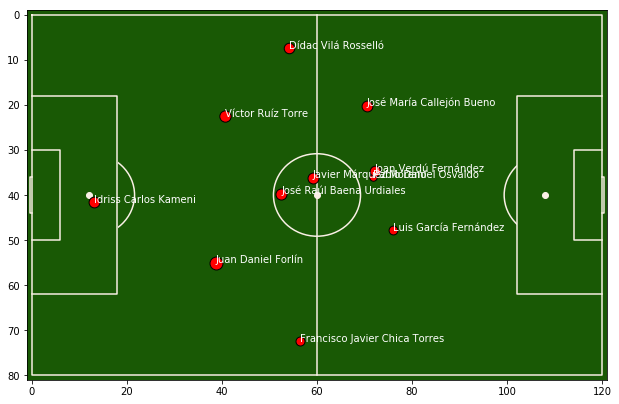

In [14]:
players = home_team_list
#fig=plt.figure() #set up the figures
sb.sb_pitch("#195905","#faf0e6","horizontal","full")
plt.axis('on')
plt.gca().invert_yaxis()
for player in players:
    x_avg = 0
    y_avg = 0
    touches = 0
    if player not in substitution_home: 
        play_temp = pass_home[(pass_home.player_name == player)]
    #print(play_temp.location, players[player])
        for i in range(len(play_temp)):
            touches+=1
            
            #https://math.stackexchange.com/questions/1013230/how-to-find-coordinates-of-reflected-point
            x_avg = x_avg + play_temp.iloc[i]['location'][0]
            y_avg = y_avg + play_temp.iloc[i]['location'][1]
        x_avg = x_avg/len(play_temp)
        y_avg = y_avg/len(play_temp)
    #print(x_avg,y_avg,players[player])
        plt.scatter(x_avg, y_avg, s= (3 *touches ),color="red",edgecolors="black",zorder = 15)  
        plt.annotate(player, (x_avg, y_avg),zorder = 20,color = 'white')
plt.show()

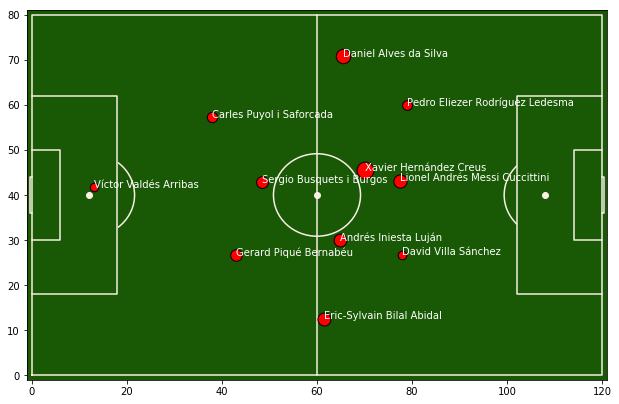

In [13]:
players = away_list #['Alisson Ramsés Becker','Fágner Conserva Lemos','Fernando Luiz Rosa','Gabriel Fernando de Jesus','João Miranda de Souza Filho','José Paulo Bezzera Maciel Júnior','Marcelo Vieira da Silva Júnior','Neymar da Silva Santos Junior','Philippe Coutinho Correia','Thiago Emiliano da Silva','Willian Borges da Silva']
sb.sb_pitch("#195905","#faf0e6","horizontal","full")
plt.axis('on')
for player in players:
    x_avg = 0
    y_avg = 0
    touches = 0
    if player not in substitution_away:
    #print(players[player])
        play_temp = pass_away[(pass_away.player_name == player)]
    #print(play_temp.location, players[player])
        for i in range(len(play_temp)):
            touches+=1
            x_avg = x_avg + play_temp.iloc[i]['location'][0]
            y_avg = y_avg + play_temp.iloc[i]['location'][1]
        x_avg = x_avg/len(play_temp)
        y_avg = y_avg/len(play_temp)
    #print(x_avg,y_avg,players[player])
        plt.scatter(x_avg, y_avg, s= (3 *touches ),color="red",edgecolors="black",zorder = 15)  
        plt.annotate(player, (x_avg, y_avg),zorder = 20,color = 'white')
plt.show()